In [37]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# File to Load (Rememdatber to change these)
city_csv = pd.read_csv("C:\\Users\\silva\\Documents\\GitHub\\Pyber\\city_data.csv")
ride_csv = pd.read_csv("C:\\Users\\silva\\Documents\\GitHub\\Pyber\\ride_data.csv")
ride_csv.info()
city_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [15]:
ride_gdf = ride_csv.groupby(['city'], as_index=False).agg({"fare": "sum","ride_id":"count"})
ride_gdf['Average_Fare']=(ride_gdf["fare"]/ride_gdf["ride_id"])
ride_gdf = ride_gdf.rename(
    columns={"fare": 'Total_Fare',"ride_id": 'Total_Num_of_Rides'})


#ride_gr =pd.DataFrame(ride_gdf[['city' ,'Average_Fare','Total_Num_of_Rides']])
city_sub = pd.merge(ride_gdf,city_csv, on="city", how="inner")
city_sum = city_sub.drop('Total_Fare', axis=1)
city_sum.head()

# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for previewcity_sub

,city,Total_Num_of_Rides,Average_Fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

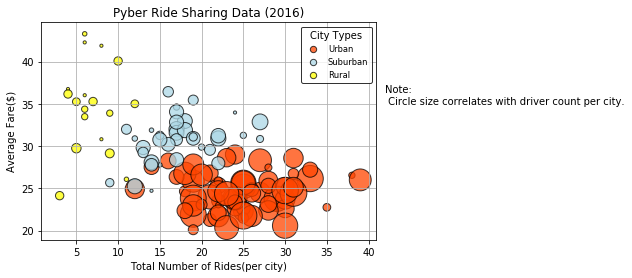

In [16]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types


sizeg =10
urb = city_sum.loc[city_sum["type"]== "Urban"]
urbx=urb["Total_Num_of_Rides"]
urby=urb["Average_Fare"]
plt.scatter(urbx, urby, color = "orangered", edgecolors="black", s = urb["driver_count"]*sizeg, 
            label = "Urban", alpha = 0.75, linewidth = 1)

sub = city_sum.loc[city_sum["type"]== "Suburban"]
subx=sub["Total_Num_of_Rides"]
suby=sub["Average_Fare"]
plt.scatter(subx, suby, color = "lightblue", edgecolors="black", s = sub["driver_count"]*sizeg, 
            label = "Suburban", alpha = 0.75, linewidth = 1)

rur = city_sum.loc[city_sum["type"]== "Rural"]
rurx=rur["Total_Num_of_Rides"]
rury=rur["Average_Fare"]
plt.scatter(rurx, rury, color = "yellow", edgecolors="black", s = rur["driver_count"]*sizeg, 
            label = "Rural", alpha = 0.75, linewidth = 1)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.grid(axis='both')
# Create a legend


lgnd = plt.legend(frameon = True, edgecolor = 'black',title="City Types",loc= "upper right",fontsize='small',markerscale=0.5)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\n Circle size correlates with driver count per city.")

plt.show()






# Save Figure


In [17]:
# Show plot
plt.show()

## Total Fares by City Type

(-1.25, 1.25, -1.25, 1.25)

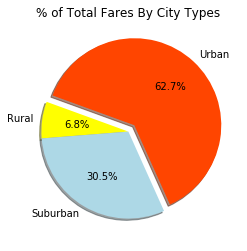

In [38]:
# Calculate Type Percents

# Build Pie Chart

type_sum = city_sub.groupby(['type'], as_index=False).agg({"Total_Fare": "sum","Total_Num_of_Rides":"sum","driver_count":"sum"})
# Save Figure

labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightblue","orangered"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(type_sum["Total_Fare"], explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis(projection='3d')



# In addition, you will be expected to produce the following three pie charts:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [28]:
# Show Figure


## Total Rides by City Type

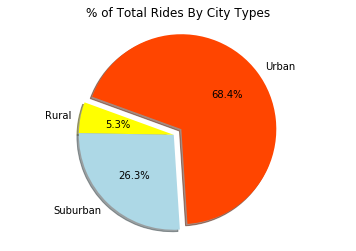

In [39]:
# type_sum = city_sub.groupby(['type'], as_index=False).agg({"Total_Fare": "sum","Total_Num_of_Rides":"sum","city":"count"})
# # Save Figure

# labels = ["Rural", "Suburban", "Urban"]
# colors = ["yellow","lightblue","orangered"]
#explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(type_sum["Total_Num_of_Rides"], explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%",shadow=True, startangle=160)

plt.axis("equal")
plt.show()

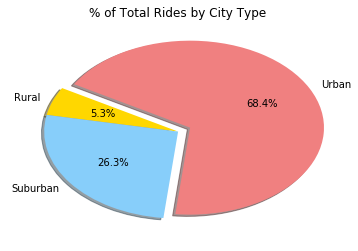

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

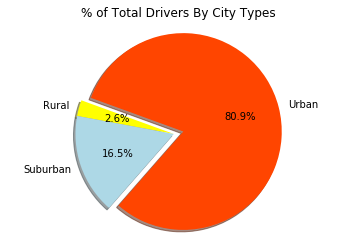

In [62]:
# Calculate Driver Percents
plt.title("% of Total Drivers By City Types")
plt.pie(type_sum["driver_count"], explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()
# Build Pie Charts

# Save Figure


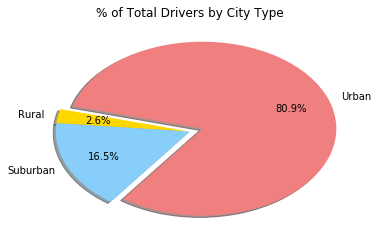

In [6]:
# Show Figure
plt.show()